In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os 
import sys 
from pathlib import Path

In [17]:
sys.path.append('/Users/christinebalili/Desktop/coralai/src/')
sys.path.append('/Users/christinebalili/Desktop/coralai/src/patcher')
sys.path.append('/Users/christinebalili/Desktop/coralai/src/inference')

In [76]:
from fastai.vision import *
from patcher import patches
from inference import helper

In [5]:
os.chdir('../')
os.getcwd()

'/Users/christinebalili/Desktop/coralai'

## Define transformations and parameters

In [6]:
bs = 128
tfms = get_transforms()

## Loading the trained RESNET model

In [8]:
path = Path('data')
data_holder = ImageDataBunch.load_empty(path)
actual_data_for_model = load_data(path, "models/benthoz_data.databunch", bs=bs, dl_tfms=tfms)

In [9]:
test_image_list = ImageItemList.from_folder('data/test', convert_mode='RGB')

In [10]:
labels = test_image_list.label_from_folder()

### Show sample image in test set

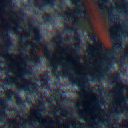

In [11]:
test_image_list[101]

### Loading the model 

In [13]:
learn = create_cnn(data_holder, models.resnet18)
learn = learn.load('ten_epochs_test')

In [14]:
learn.predict(test_image_list[101])

(Category 59,
 tensor(113),
 tensor([2.6164e-04, 1.0444e-07, 4.9128e-04, 1.2754e-04, 6.2414e-06, 3.1438e-06,
         4.3467e-04, 1.8139e-04, 9.7554e-04, 1.7975e-03, 5.5580e-03, 5.8464e-04,
         2.4352e-03, 5.8204e-07, 2.1828e-05, 2.2422e-04, 4.1855e-04, 5.2719e-03,
         3.4894e-03, 4.5979e-03, 1.9921e-05, 1.9780e-04, 8.4048e-04, 3.4914e-05,
         7.8651e-04, 2.5004e-04, 7.7541e-04, 1.8515e-04, 3.7749e-04, 1.2750e-04,
         2.2518e-04, 1.3439e-04, 3.4856e-05, 6.5746e-06, 3.5064e-07, 3.6320e-06,
         7.3579e-04, 3.3456e-05, 3.0067e-03, 6.9298e-04, 3.4225e-04, 8.6531e-07,
         2.9022e-04, 2.1793e-03, 1.8338e-03, 5.2995e-04, 5.1613e-04, 4.6059e-05,
         1.0278e-03, 2.3419e-04, 1.6785e-06, 2.7705e-04, 7.7703e-07, 1.3460e-03,
         6.9082e-05, 1.2845e-05, 4.2113e-02, 3.4826e-04, 5.0242e-04, 2.8371e-03,
         1.3387e-05, 1.8574e-03, 1.2122e-03, 4.3091e-04, 1.1109e-03, 1.0385e-03,
         3.0039e-04, 4.5431e-04, 1.7589e-06, 4.0425e-04, 4.0646e-04, 2.6424e-04,


### Get an image an extract patches from it

In [27]:
test_image = patches.get_image("benthoz_images/PR_20090326_013856_939_LC16.tif")
test_img_patches = helper.generate_patches_from_img(test_image)

/anaconda3/envs/coralai/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/envs/coralai/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


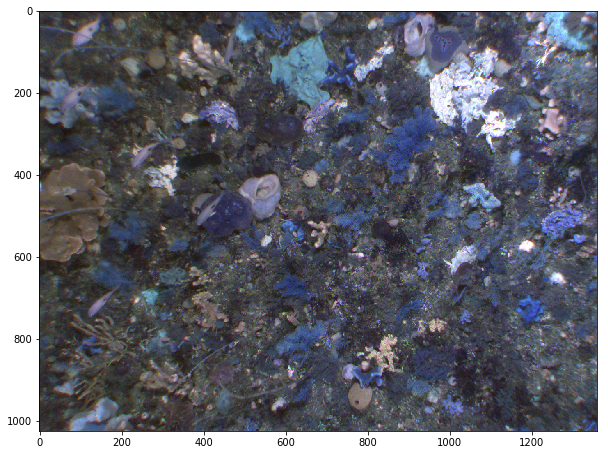

In [28]:
# Original image
plt.figure(figsize=(10, 10))
plt.imshow(test_image)

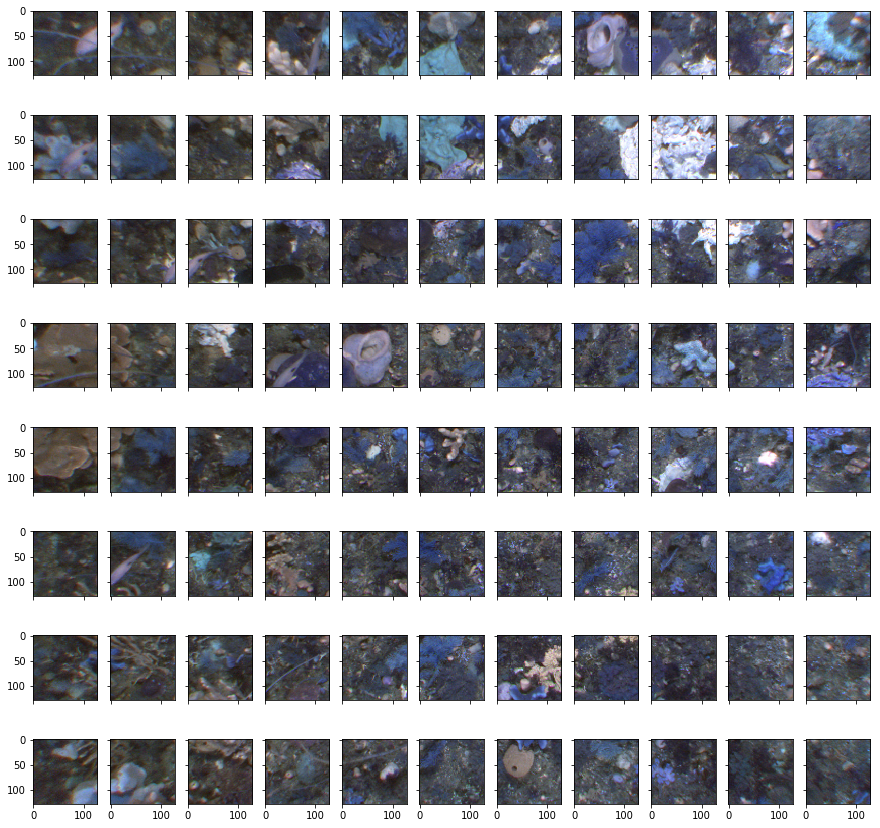

In [29]:
fig, ax = plt.subplots(8, 11, figsize = (15, 15), sharex='col', sharey='row')

for (r, c) in test_img_patches:
    ax[r, c].imshow(test_img_patches[r, c])

### Predict the classes for each image patch

In [93]:
predictions = {}

for (r, c) in test_img_patches: 
    test_img_patch = tensor(test_img_patches[(r, c)].astype(np.float32))
    test_img_patch = test_img_patch.permute(2, 0, 1)    
    test_img_patch = Image(test_img_patch)
    
    predictions[(r, c)] = learn.predict(test_img_patch)

### Load id lookups

In [95]:
id_lookups = pd.read_csv(os.path.join('data_splits', 'idlookups.csv'))
id_lookups.set_index('id', inplace=True)

id_lookups_mapping = id_lookups['name'].to_dict()

In [106]:
title = predictions[(r, c)][0]
title

Category 2

In [ ]:
ax.set_title("\n".join(wrap("Some really really long long long title I really really need - and just can't - 
                            just can't - make it any - simply any - shorter - at all.", 60)))

### Plot segments with predicted labels

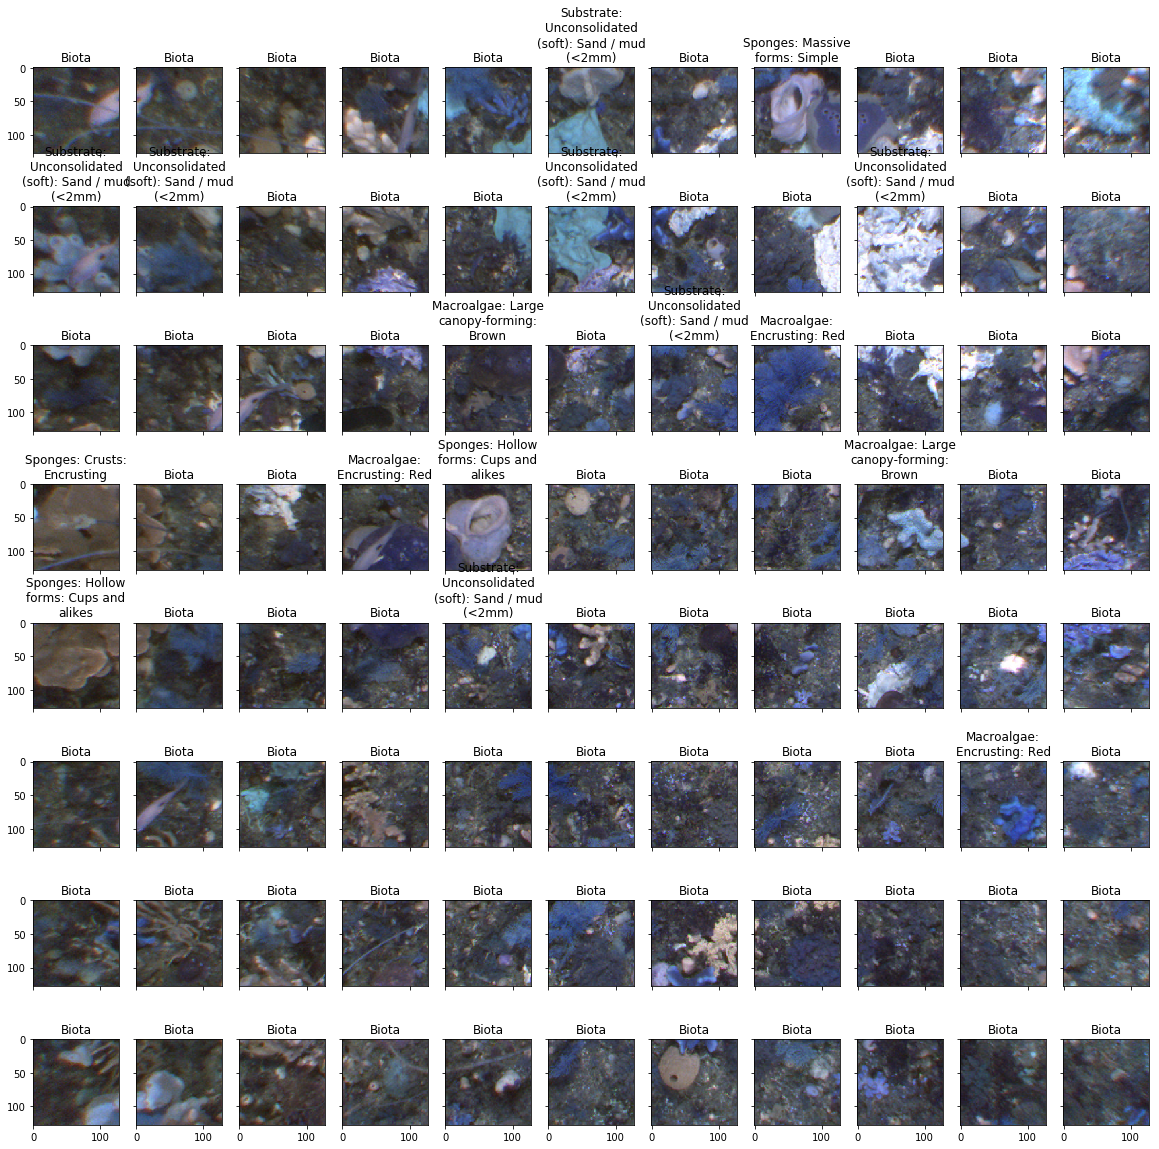

In [110]:
from textwrap import wrap
fig, ax = plt.subplots(8, 11, figsize = (20, 20), sharex='col', sharey='row')

for (r, c) in test_img_patches:
    title = int(str(predictions[(r, c)][0]))
    title = id_lookups_mapping[title]
    
    ax[r, c].imshow(test_img_patches[r, c])
    ax[r, c].set_title("\n".join(wrap(title, 20)))

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,4))
for i,ax in enumerate(axs): img.show(ax=ax, title=f'Copy {i+1}')